In [541]:
import os
from importlib import reload

import cfGPR
import vonkarman as vk
import plotGPR

import gbutil

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

/home/fortino/DESworkspace/plotGPR.py:299: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x = np.where(
/home/fortino/DESworkspace/plotGPR.py:303: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y = np.where(
/home/fortino/DESworkspace/plotGPR.py:307: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights = np.where(
/home/fortino/DESworkspace/plotGPR.py:318: RuntimeWarning: invalid value encountered in less
  # Finally take the relevant points to plot
/home/fortino/DESworkspace/plotGPR.py:325: RuntimeWarning: invalid value encountered in greater
  
/home/fortino/DESworkspace/plotGPR.py:326: RuntimeWarning: invalid value encountered in greater
  # Calculate rms and noise and print it.
/home/fortino/DESworkspace/plotGPR.py:327: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas


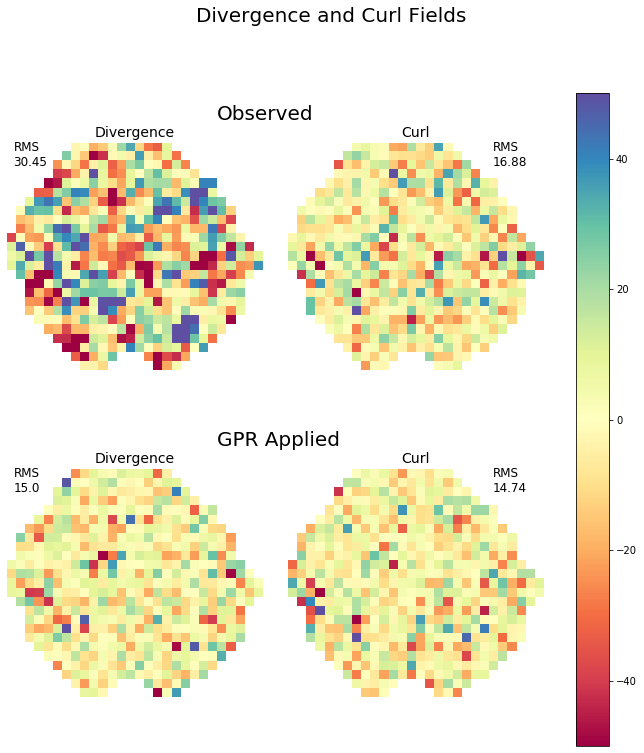

In [547]:
reload(plotGPR)

    def plot_Emode_2ptcorr(self, X, Y, Y2=None, Bmode=True, rrange=(5./3600., 1.5), nbins=100, nAvg=30, plot_avg_line=True, save=False):
        """
        Use treecorr to produce angle-averaged 2-point correlation functions of astrometric error for the supplied sample of data, using brute-force pair counting.
        
        Returns:
            logr (ndarray): mean log of radius in each bin
            xi_+ (ndarray): <vr1 vr2 + vt1 vt2> = <vx1 vx2 + vy1 vy2>
            xi_- (ndarray): <vr1 vr2 - vt1 vt2>
        """
        
        # Initialize the pyplot figure
        plt.figure(figsize=(8, 8))
        plt.title("E Mode Correlation")
        plt.xlabel('Separation (degrees)')
        plt.ylabel('xi (mas^2)')
        
        # Solve for weighted and pixelized residuals, as well as angle averaged correlation function.
        u, v, dx, dy = X[:, 0], X[:, 1], Y[:, 0], Y[:, 1]
        logr, xiplus, ximinus, xicross, xiz2 = vcorr(u, v, dx, dy)
        
        # Calculate xiE and xiB
        dlogr = np.zeros_like(logr)
        dlogr[1:-1] = 0.5 * (logr[2:] - logr[:-2])
        tmp = np.array(ximinus) * dlogr
        integral = np.cumsum(tmp[::-1])[::-1]
        self.xiB = 0.5 * (xiplus - ximinus) + integral
        self.xiE = xiplus - self.xiB
        
        # Plot xiE
        plt.semilogx(np.exp(logr), self.xiE, 'r.', label="E Mode (Observed)")
        print(f"Mean of first {nAvg} points (Emode (Observed)): ", np.nanmean(self.xiE[:nAvg]))

        if Bmode:
            # Plot xiB
            plt.title("E and B Mode Correlation")
            plt.semilogx(np.exp(logr), self.xiB, 'b.', label="B Mode (Observed)")
            plt.legend(framealpha=0.3)
            print(f"Mean of first {nAvg} points (Bmode (Observed)): ", np.nanmean(self.xiB[:nAvg]))
        
        
        if Y2 is not None:
            
            # Solve for weighted and pixelized residuals, as well as angle averaged correlation function.
            u, v, dx, dy = X[:, 0], X[:, 1], Y2[:, 0], Y2[:, 1]
            logr2, xiplus2, ximinus2, xicross2, xiz22 = vcorr(u, v, dx, dy)
            
            # Calculate xiE and xiB
            dlogr2 = np.zeros_like(logr2)
            dlogr2[1:-1] = 0.5 * (logr2[2:] - logr2[:-2])
            tmp2 = np.array(ximinus2) * dlogr2
            integral2 = np.cumsum(tmp2[::-1])[::-1]
            self.xiB2 = 0.5 * (xiplus2 - ximinus2) + integral2
            self.xiE2 = xiplus2 - self.xiB2
            
            # Plot xiE
            plt.semilogx(np.exp(logr2), self.xiE2, 'rx', label="E Mode (GPR Applied)")    
            print(f"Mean of first {nAvg} points (Emode (GPR Applied)): ", np.nanmean(self.xiE2[:nAvg]))
            
            if Bmode:
                # Plot xiB
                plt.semilogx(np.exp(logr2), self.xiB2, 'bx', label='B Mode (GPR Applied)')
                print(f"Mean of first {nAvg} points (Bmode (GPR Applied)): ", np.nanmean(self.xiB2[:nAvg]))
            
            
            plt.legend(framealpha=0.3)
            
            print(f"Ratio of E modes: {np.nanmean(self.xiE[:nAvg]) / np.nanmean(self.xiE2[:nAvg])}")
            print(f"Ratio of B modes: {np.nanmean(self.xiB[:nAvg]) / np.nanmean(self.xiB2[:nAvg])}")

            
        if plot_avg_line:
            plt.axvline(x=np.exp(logr)[nAvg], color='k', linestyle='--')
        
        # Show plots
        plt.grid()
        
        if save:
            plt.savefig(os.path.join(self.outdir, "Emode.pdf"))
        
        plt.show()


reload(plotGPR)
GP = np.load("../vkexposures/450/450.npz")
DivCurl(
    GP["Xtest"][:, 0]*u.deg,
    GP["Xtest"][:, 1]*u.deg,
    GP["Ytest"][:, 0]*u.mas,
    GP["Ytest"][:, 1]*u.mas,
    GP["Etest"][:, 0]*u.mas,
    x2=GP["Xtest"][:, 0]*u.deg,
    y2=GP["Xtest"][:, 1]*u.deg,
    dx2=GP["Ytest"][:, 0]*u.mas - GP["fbar_s"][:, 0]*u.mas,
    dy2=GP["Ytest"][:, 1]*u.mas - GP["fbar_s"][:, 1]*u.mas,
    err2=GP["Etest"][:, 0]*u.mas,
    savedir="."
    )